Accuracy: 0.9810
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.00      0.00      0.00       161

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



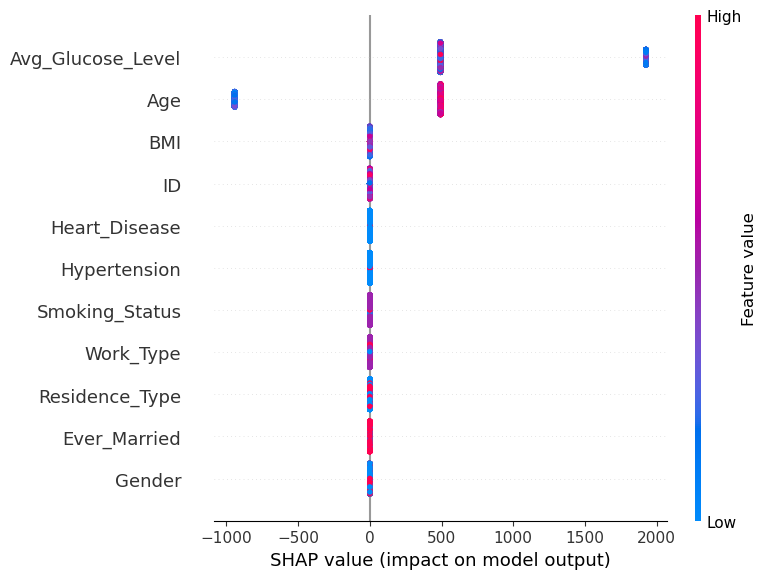

C:\Users\NUNE VYSHALI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


True

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap
import lime
import lime.lime_tabular
from sklearn.preprocessing import LabelEncoder
import webbrowser
import os

# Load the dataset
df = pd.read_csv("E:\\AD-2; 3-2\\AD2 CODDE 2\\Stroke.csv\\Stroke.csv")

# Handle missing values
# For numerical columns, fill missing values with the mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# For categorical columns, fill missing values with the mode (most frequent value)
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Convert categorical columns into numeric using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Assume the target variable is 'stroke' (1 if stroke occurred, 0 if not)
X = df.drop('Stroke', axis=1)  # Features (exclude the target variable)
y = df['Stroke']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# SHAP Explanation
# Create a SHAP explainer object for the Gradient Boosting model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot: Check if we have multiple classes, then plot for class 1 (stroke)
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test)  # For class 1 (stroke)
else:
    shap.summary_plot(shap_values, X_test)  # For binary classification, single array

# LIME Explanation
# Initialize the LIME explainer for tabular data
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    training_labels=y_train.values,
    mode='classification',
    feature_names=X.columns,
    class_names=['No Stroke', 'Stroke'],
    discretize_continuous=True
)

# Pick a random sample from the test set to explain
i = 25  # Choose a sample index to explain
explanation = lime_explainer.explain_instance(X_test.iloc[i].values, model.predict_proba)

# Save the LIME explanation to HTML file with UTF-8 encoding
lime_html_path = "lime_explanation.html"
with open(lime_html_path, 'w', encoding='utf-8') as f:
    f.write(explanation.as_html())

# Automatically open the HTML file in the default web browser
webbrowser.open(f'file://{os.path.realpath(lime_html_path)}')